# Projeto Music
### - Classificar uma música de acordo com o gosto de um usuário e retornar uma lista de músicas com maior probabilidade de serem shippadas pelo usuário / Qual a probabilidade dele gostar da música ?
### - Prever a Popularidade de uma Música

# 

## Importando Módulos

In [1]:
import pandas as pd
from category_encoders import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# 

## Data Exploration

## DATASET DJS
### https://www.kaggle.com/koki25ando/dj-mag-top-100-history-dataset

In [31]:
#Carregando e visualizando as dimensões do dataset
dj = pd.read_csv("C:/Users/KÁTIA/Desktop/EVOLUTION 2020/PROJETOS/MUSIC/DJ_Mag.csv",sep=',')
dj.shape

(1400, 5)

In [32]:
alldjs = dj.DJ.unique().tolist()

# 

## DATASET MUSIC FEATURES PRIMARY
### https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db

In [33]:
#Carregando e visualizando as dimensões do dataset
df = pd.read_csv("C:/Users/KÁTIA/Desktop/EVOLUTION 2020/PROJETOS/MUSIC/SpotifyFeatures.csv",sep=',')
df.shape

(232725, 18)

In [34]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [35]:
#Aplicando one hot encoder na variável genre
enc = OneHotEncoder(cols=['genre'],use_cat_names=True).fit(df.genre)

#Adicionando one hot ao dataframe base
df = pd.concat([df,enc.transform(df.genre)],axis='columns')

#Removendo colunas genre
df.drop(columns='genre',inplace=True)

#Agrupando o df com todas variáveis com exceção dos gêneros e somando as variáveis dummies de gêneros
#Por resultado não teremos mais músicas duplicadas e cada música poderá ter mais de um gênero
df = df.groupby(['artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence']).sum().reset_index()

df.shape

(191056, 44)

In [36]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'genre_Movie', 'genre_R&B',
       'genre_A Capella', 'genre_Alternative', 'genre_Country', 'genre_Dance',
       'genre_Electronic', 'genre_Anime', 'genre_Folk', 'genre_Blues',
       'genre_Opera', 'genre_Hip-Hop', 'genre_Children's Music',
       'genre_Children’s Music', 'genre_Rap', 'genre_Indie', 'genre_Classical',
       'genre_Pop', 'genre_Reggae', 'genre_Reggaeton', 'genre_Jazz',
       'genre_Rock', 'genre_Ska', 'genre_Comedy', 'genre_Soul',
       'genre_Soundtrack', 'genre_World'],
      dtype='object')

In [37]:
#Selecionando artistas do meu gosto
art = ['Martin Garrix', 'Avicii', 'Kygo', 'David Guetta', 'Marshmello', 'Alan Walker', 'Don Diablo', 'Skrillex', 'Robin Schulz', 'Cheat Codes',
       'Major Lazer', 'R3HAB', 'Gryffin', 'Calvin Harris', 'Alok', 'DubVision', 'Cat Dealers', 'Kungs', 'Lost Frequencies', 'Jonas Blue', 'DJ Snake',
      'Sound of Legend', 'Afrojack', 'Swedish House Mafia', 'Sia', 'Ellie Goulding', 'Galantis', 'The Chainsmokers', 'Jack Ü', 'Tiësto','Hardwell',
       'Martin Jensen','Tobu', 'Zedd',  'Alesso', 'Dimitri Vegas & Like Mike',  'Vicetone',  'Diplo',  'Nicky Romero',  'Sam Feldt','Daft Punk']

In [40]:
no = []

sel = pd.DataFrame()

for i in range(0,len(art)):

    sel=pd.concat([sel,df[df['artist_name']==art[i]]]) #.reset_index(drop=True)
     
    if df[df['artist_name']==art[i]].shape[0] == 0:
        no.append(art[i])

#Criando lista com os indexes originais das músicas originais para criar a target posteriormente
sel_target = sel.index.tolist()
#sel = sel.reset_index(drop=True)
print("Artistas Encontrados | Quantidade de Músicas\n\n{}\n\nArtistas não Encontrados\n\n{}".format(sel.artist_name.value_counts(),no))

Artistas Encontrados | Quantidade de Músicas

Daft Punk                    133
Sia                           75
David Guetta                  73
The Chainsmokers              72
Calvin Harris                 68
DJ Snake                      58
Avicii                        48
Ellie Goulding                39
Gryffin                       37
Marshmello                    34
Galantis                      33
R3HAB                         32
Major Lazer                   31
Tiësto                        28
Zedd                          26
Kygo                          21
Jonas Blue                    19
Alesso                        18
Cheat Codes                   18
Robin Schulz                  17
Don Diablo                    16
Dimitri Vegas & Like Mike     15
Hardwell                      12
Afrojack                      11
Diplo                          9
Vicetone                       9
Martin Jensen                  8
Martin Garrix                  7
Swedish House Mafia           

In [41]:
#Musicas selecionadas mais populares
sel.sort_values(by='popularity',ascending = False).head(10)

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,genre_Pop,genre_Reggae,genre_Reggaeton,genre_Jazz,genre_Rock,genre_Ska,genre_Comedy,genre_Soul,genre_Soundtrack,genre_World
112578,Marshmello,Happier,2dpaYNEQHiRxtZbfNsse99,97,0.19100,0.687,214290,0.792,0.000000,F,...,1,0,0,0,0,0,0,0,0,0
36750,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",4w8niZpiMy6qz1mntFA5uM,96,0.15300,0.841,212500,0.798,0.000003,C#,...,1,0,0,0,0,0,0,0,0,0
25705,Calvin Harris,Giant (with Rag'n'Bone Man),5itOtNx0WxtJmi1TQ3RuRd,94,0.01600,0.807,229184,0.887,0.000503,C#,...,1,0,0,0,0,0,0,0,0,0
48748,Ellie Goulding,Close To Me (with Diplo) (feat. Swae Lee),5JEx7HbmvHQQswJCsoo9rA,92,0.09690,0.574,182623,0.758,0.000000,C#,...,1,0,0,0,0,0,0,0,0,0
164116,The Chainsmokers,Who Do You Love (with 5 Seconds of Summer),11cDEev79fPKi6uJCjUhu8,92,0.00791,0.510,226747,0.835,0.000000,D#,...,1,0,0,0,0,0,0,0,0,0
25740,Calvin Harris,Promises (with Sam Smith),5N5k9nd479b1xpDZ4usjrg,91,0.01190,0.781,213309,0.768,0.000005,B,...,1,0,0,0,0,0,0,0,0,0
164115,The Chainsmokers,Who Do You Love (with 5 Seconds of Summer),11cDEev79fPKi6uJCjUhu8,91,0.00791,0.510,226747,0.835,0.000000,D#,...,0,0,0,0,0,0,0,0,0,0
25739,Calvin Harris,Promises (with Sam Smith),5N5k9nd479b1xpDZ4usjrg,90,0.01190,0.781,213309,0.768,0.000005,B,...,0,0,0,0,0,0,0,0,0,0
25731,Calvin Harris,One Kiss (with Dua Lipa),7ef4DlsgrMEH11cDZd32M6,89,0.03700,0.791,214847,0.862,0.000022,A,...,1,0,0,0,0,0,0,0,0,0
188405,Zedd,365,2XWjPtKdi5sucFYtVav07d,88,0.33900,0.745,181900,0.693,0.000000,D,...,1,0,0,0,0,0,0,0,0,0


In [42]:
sel[sel['artist_name']=='Kygo'].sort_values(by='popularity',ascending=False)

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,genre_Pop,genre_Reggae,genre_Reggaeton,genre_Jazz,genre_Rock,genre_Ska,genre_Comedy,genre_Soul,genre_Soundtrack,genre_World
98937,Kygo,Happy Now,14sOS5L36385FJ3OL8hew4,88,0.3740,0.693,211362,0.575,0.000000,A,...,1,0,0,0,0,0,0,0,0,0
98952,Kygo,Think About You (feat. Valerie Broussard),3Kuu5vASpXK8oRsxOvau6P,86,0.1660,0.673,208567,0.596,0.000000,A#,...,1,0,0,0,0,0,0,0,0,0
98945,Kygo,Remind Me to Forget,5sIx4BlfYGuZeSLF40N9GH,81,0.1930,0.685,217287,0.508,0.000000,C,...,1,0,0,0,0,0,0,0,0,0
98946,Kygo,Stargazing,0Zbbxnx4SGGHoIow4PpISP,79,0.1520,0.677,236853,0.497,0.000000,F,...,1,0,0,0,0,0,0,0,0,0
98935,Kygo,Firestone (feat. Conrad Sewell),1I8tHoNBFTuoJAlh4hfVVE,78,0.4080,0.486,273684,0.652,0.000066,B,...,1,0,0,0,0,0,0,0,0,0
98948,Kygo,Stole the Show,5masKPHeAOVNgxdLebIcK7,76,0.1550,0.679,222801,0.662,0.000000,G#,...,1,0,0,0,0,0,0,0,0,0
98936,Kygo,First Time,2Gl0FzuLxflY6nPifJp5Dr,75,0.1970,0.633,193511,0.592,0.000000,C,...,1,0,0,0,0,0,0,0,0,0
98933,Kygo,Born To Be Yours,0WVAQaxrT0wsGEG4BCVSn2,71,0.3000,0.688,193321,0.688,0.000000,D#,...,1,0,0,0,0,0,0,0,0,0
98938,Kygo,Happy Now - R3HAB Remix,7AkLPOwjju8taQCJCaIUts,71,0.0173,0.623,189268,0.840,0.000000,A,...,1,0,0,0,0,0,0,0,0,0
98941,Kygo,It Ain’t Me (with Selena Gomez),12GEpg2XOPyqk03JZEZnJs,71,0.1190,0.640,220781,0.533,0.000000,C,...,1,0,0,0,0,0,0,0,0,0


In [12]:
sel.describe().iloc[:,1:20]

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_Movie,genre_R&B,genre_A Capella,genre_Alternative,genre_Country,genre_Dance,genre_Electronic,genre_Anime,genre_Folk
count,988.000000,988.000000,9.880000e+02,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.0,988.000000,988.0,988.0,988.0,988.000000,988.000000,988.0,988.0
mean,0.116760,0.623629,2.253256e+05,0.757805,0.125729,0.202872,-5.417114,0.079283,122.715536,0.437114,0.0,0.031377,0.0,0.0,0.0,0.634615,0.189271,0.0,0.0
std,0.165092,0.119884,1.013088e+05,0.143536,0.269912,0.159635,2.537236,0.073049,20.875180,0.214783,0.0,0.174421,0.0,0.0,0.0,0.481782,0.391922,0.0,0.0
min,0.000003,0.189000,5.140000e+04,0.177000,0.000000,0.014900,-20.125000,0.025300,66.006000,0.020500,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
25%,0.008325,0.544000,1.894998e+05,0.678000,0.000000,0.096500,-6.374250,0.040075,109.531250,0.273000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
50%,0.043200,0.628000,2.106730e+05,0.783000,0.000032,0.139000,-4.924000,0.053700,124.721000,0.418000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0
75%,0.159500,0.708250,2.374242e+05,0.867250,0.024500,0.276250,-3.831000,0.085725,128.105500,0.581250,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0
max,0.950000,0.956000,2.731067e+06,0.997000,0.994000,0.980000,0.634000,0.800000,203.893000,0.977000,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0


# 

In [13]:
#DJS
no = []

sel = pd.DataFrame()

for i in range(0,len(alldjs)):

    sel=pd.concat([sel,df[df['artist_name']==alldjs[i]]]).reset_index(drop=True)
     
    if df[df['artist_name']==alldjs[i]].shape[0] == 0:
        no.append(alldjs[i])
    
print("DJS Encontrados | Quantidade de Músicas\n\n{}\n\nDJS não Encontrados\n\n{}".format(sel.artist_name.value_counts().head(30),no))

DJS Encontrados | Quantidade de Músicas

Daft Punk                133
Dillon Francis            93
Yellow Claw               84
David Guetta              73
The Chainsmokers          72
Justice                   71
Zomboy                    71
Calvin Harris             68
The Chemical Brothers     66
Flux Pavilion             62
Alison Wonderland         59
DJ Snake                  58
Borgore                   55
Fatboy Slim               54
Avicii                    48
Jauz                      46
Steve Aoki                43
Flume                     37
Marshmello                34
Galantis                  33
Major Lazer               31
Paul Oakenfold            28
Tiësto                    28
Zedd                      26
Kygo                      21
Alesso                    18
Kaskade                   17
Robin Schulz              17
Trentemøller              17
Booka Shade               17
Name: artist_name, dtype: int64

DJS não Encontrados

['Paul van Dyk', 'Armin Van Buuren'

# 

## Processing Data

In [166]:
#Visualizando as features do dataset
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'genre_Movie', 'genre_R&B',
       'genre_A Capella', 'genre_Alternative', 'genre_Country', 'genre_Dance',
       'genre_Electronic', 'genre_Anime', 'genre_Folk', 'genre_Blues',
       'genre_Opera', 'genre_Hip-Hop', 'genre_Children's Music',
       'genre_Children’s Music', 'genre_Rap', 'genre_Indie', 'genre_Classical',
       'genre_Pop', 'genre_Reggae', 'genre_Reggaeton', 'genre_Jazz',
       'genre_Rock', 'genre_Ska', 'genre_Comedy', 'genre_Soul',
       'genre_Soundtrack', 'genre_World', 'target'],
      dtype='object')

In [171]:
#Removendo colunas desnecessárias no momento
df = df.drop(columns=['artist_name', 'track_name', 'track_id', 'duration_ms', 'key', 'mode', 'time_signature'])
df.head(1)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,genre_Reggae,genre_Reggaeton,genre_Jazz,genre_Rock,genre_Ska,genre_Comedy,genre_Soul,genre_Soundtrack,genre_World,target
0,40,0.00412,0.874,0.814,0.464,0.069,-6.873,0.045,121.976,0.741,...,0,0,0,0,0,0,0,0,0,0


## Target

In [172]:
df['target'] = np.nan
df.loc[sel_target,['target']] = 1
df.fillna(0,inplace=True)
df.target = df.target.astype(int)
df.target.value_counts()

0    190068
1       988
Name: target, dtype: int64

In [174]:
#not_sel_target = df.index.tolist()

#for i in range(0,len(sel_target)):
    #not_sel_target.remove(sel_target[i])

# 

## Save Data

In [176]:
df.to_csv("music.csv",sep=";",index=False)

## Load Data

In [2]:
df = pd.read_csv("music.csv",sep=";")
df.tail(5)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,genre_Reggae,genre_Reggaeton,genre_Jazz,genre_Rock,genre_Ska,genre_Comedy,genre_Soul,genre_Soundtrack,genre_World,target
191051,27,0.692,0.505,0.629,0.000000,0.6870,-8.847,0.0369,109.994,0.244,...,0,0,0,0,0,0,0,0,1,0
191052,27,0.854,0.511,0.445,0.000000,0.5890,-8.401,0.0280,124.417,0.201,...,0,0,0,0,0,0,0,0,1,0
191053,22,0.637,0.386,0.894,0.000003,0.3550,-5.414,0.0544,125.752,0.329,...,0,0,0,0,0,0,0,0,1,0
191054,23,0.756,0.282,0.345,0.000000,0.0868,-9.464,0.0301,123.098,0.129,...,0,0,0,0,0,0,0,0,1,0
191055,45,0.387,0.369,0.453,0.000000,0.1210,-8.442,0.1480,84.079,0.235,...,0,0,0,0,0,0,0,0,0,0


# 

# Modelagem (Beta)

## Split Data

In [3]:
#Amostragem
xtr, xts, ytr, yts = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], train_size=0.6, random_state=0)

print("Proporção da classe 1 nos dados de Treino e Teste, respectivamente: {:.2f}%, {:.2f}%".format(ytr.value_counts()[1]/ytr.value_counts().sum()*100,
                                                                                            yts.value_counts()[1]/yts.value_counts().sum()*100))

Proporção da classe 1 nos dados de Treino e Teste, respectivamente: 0.55%, 0.47%


In [4]:
#Amostragem estratificada
xtr, xts, ytr, yts = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], train_size=0.6, random_state=0, stratify=df.iloc[:,-1])

print("Proporção da classe 1 nos dados de Treino e Teste, respectivamente: {:.2f}%, {:.2f}%".format(ytr.value_counts()[1]/ytr.value_counts().sum()*100,
                                                                                            yts.value_counts()[1]/yts.value_counts().sum()*100))

Proporção da classe 1 nos dados de Treino e Teste, respectivamente: 0.52%, 0.52%


## Métricas

In [5]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Baseline

In [6]:
ypred = []

for i in range(0,xtr.shape[0]):

    id=xtr.index[i]
    if  (xtr.loc[[id],'popularity'].values[0] > 65) and (xtr.loc[[id],'genre_Pop'].values[0] == 1) or (xtr.loc[[id],'genre_Dance'].values[0] == 1) or (xtr.loc[[id],'genre_Electronic'].values[0] == 1):
        p=1
    else:
        p=0
        
    ypred.append(p)

In [22]:
#Salvando previsões da Baseline
df_ypred = pd.DataFrame({'ypred':ypred})
df_ypred.to_csv("df_ypred.csv",sep=";",index=False)

In [7]:
recall_score(ypred,ytr,average='weighted')

0.8916716826742735

## Algoritmo

In [8]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(random_state=0, class_weight='balanced',n_jobs=-1)
#utilizando class_weight para colocar pesos nas métricas de avaliação com finalidade de equalizar os tipos de classes

lgr.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
lgr.score(xtr,ytr)

0.9146668062425305

In [10]:
lgr.coef_

array([[ 0.04499221, -1.92571678,  0.35795135,  0.10720693,  1.02462928,
         0.71984347,  0.11975203, -2.14638231,  0.00618175, -0.70436   ,
        -0.71883334,  1.02082526, -0.00836165, -3.36590022, -3.46487135,
         3.52672042,  2.37568514, -2.32912099, -2.89331919, -2.08110975,
        -0.34802766, -5.7804054 , -0.41981887, -5.37613472, -2.96633888,
        -5.48949372, -1.03823948,  2.15492074, -2.15768631, -2.827208  ,
        -3.59467544, -5.95443605, -2.21936599, -0.7139168 , -4.00861692,
        -1.83383484, -2.71214908]])

In [11]:
#Música do Kygo - Permanent
xtr.loc[[98944],:]
print(lgr.predict(xtr.loc[[98944],:])[0])
print(lgr.predict_proba(xtr.loc[[98944],:])[0][1]*100)

print()

#142814	Rihanna	We Found Love
idx=142814
xtr.loc[[idx],:]
print(lgr.predict(xtr.loc[[idx],:])[0])
print(lgr.predict_proba(xtr.loc[[idx],:])[0][1]*100)

1
89.31419672792849

1
97.80525802545947


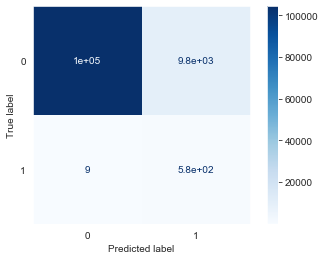

In [15]:
plot_confusion_matrix(lgr,xtr,ytr,cmap="Blues")

sns.set_style("dark")

plt.show()

In [13]:
print(classification_report(lgr.predict(xtr),ytr))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96    104276
           1       0.98      0.06      0.11     10357

    accuracy                           0.91    114633
   macro avg       0.95      0.53      0.53    114633
weighted avg       0.92      0.91      0.88    114633



In [14]:
print(recall_score(lgr.predict(xtr),ytr,average='weighted'))
print(f1_score(lgr.predict(xtr),ytr,average='weighted'))

0.9146668062425305
0.8785296776636873


# 

## Load Data

In [23]:
df = pd.read_csv("music.csv",sep=";")
df.tail(5)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,genre_Reggae,genre_Reggaeton,genre_Jazz,genre_Rock,genre_Ska,genre_Comedy,genre_Soul,genre_Soundtrack,genre_World,target
191051,27,0.692,0.505,0.629,0.000000,0.6870,-8.847,0.0369,109.994,0.244,...,0,0,0,0,0,0,0,0,1,0
191052,27,0.854,0.511,0.445,0.000000,0.5890,-8.401,0.0280,124.417,0.201,...,0,0,0,0,0,0,0,0,1,0
191053,22,0.637,0.386,0.894,0.000003,0.3550,-5.414,0.0544,125.752,0.329,...,0,0,0,0,0,0,0,0,1,0
191054,23,0.756,0.282,0.345,0.000000,0.0868,-9.464,0.0301,123.098,0.129,...,0,0,0,0,0,0,0,0,1,0
191055,45,0.387,0.369,0.453,0.000000,0.1210,-8.442,0.1480,84.079,0.235,...,0,0,0,0,0,0,0,0,0,0


# 

# Modelagem

## Split Data

In [24]:
#Amostragem estratificada
tr, ts = train_test_split(df.iloc[:,:], train_size=0.6, random_state=0, stratify=df.iloc[:,-1])
print(tr.shape,ts.shape)

(114633, 38) (76423, 38)


## Metrics

In [25]:
from sklearn.metrics import recall_score, f1_score, plot_confusion_matrix

## Baseline

In [26]:
ypred = []

for i in range(0,xtr.shape[0]):

    id=xtr.index[i]
    if  (xtr.loc[[id],'popularity'].values[0] > 65) and (xtr.loc[[id],'genre_Pop'].values[0] == 1) or (xtr.loc[[id],'genre_Dance'].values[0] == 1) or (xtr.loc[[id],'genre_Electronic'].values[0] == 1):
        p=1
    else:
        p=0
        
    ypred.append(p)
    
recall_score(ypred,ytr,average='weighted')

0.8916716826742735

In [27]:
#Salvando previsões da Baseline
df_ypred = pd.DataFrame({'ypred':ypred})
df_ypred.to_csv("df_ypred2.csv",sep=";",index=False)

## Cross-Validation

In [28]:
xtr.shape

(114633, 37)

In [47]:
from sklearn.model_selection import RepeatedKFold
#Balancear as classes em cada split
rkf = RepeatedKFold(n_splits=3,n_repeats=5,random_state=0)

In [30]:
score = []

for lines_tr, lines_val in rkf.split(tr):
    
    t = 'target'
    xtr, ytr = tr.iloc[lines_tr,:].drop(columns=t), tr.iloc[lines_tr,:][t].values
    xval, yval = tr.iloc[lines_val,:].drop(columns=t), tr.iloc[lines_val,:][t].values
    
    lgr = LogisticRegression(random_state=0,class_weight='balanced',n_jobs=-1)
    lgr.fit(xtr,ytr)
    
    s = recall_score(lgr.predict(xtr),ytr,average='weighted')
    
    score.append(s)

print(np.mean(score))

0.911700819135851


# 

# SEARCH : Como tunar Logistic Regression ?

In [78]:
?LogisticRegression

Init signature: LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will 

## Tunning Manual

In [76]:
C = [0.01, 0.1, 0.25, 0.5, 0.75, 1.0]

print("C - Recall\n")
for i in range(0,len(C)):
    
    score = []
    
    for lines_tr, lines_val in rkf.split(tr):
    
        t = 'target'
        xtr, ytr = tr.iloc[lines_tr,:].drop(columns=t), tr.iloc[lines_tr,:][t].values
        xval, yval = tr.iloc[lines_val,:].drop(columns=t), tr.iloc[lines_val,:][t].values

        lgr = LogisticRegression(random_state=0,class_weight='balanced',C=C[i],n_jobs=-1)
        lgr.fit(xtr,ytr)

        s = recall_score(lgr.predict(xtr),ytr,average='weighted')

        score.append(s)

    print("{} - {}".format(C[i],np.mean(score)))

C - Recall

0.01 - 0.9057130145769542
0.1 - 0.9109968333725892
0.25 - 0.9116519675835058
0.5 - 0.9108153847495921
0.75 - 0.9116441164411645
1.0 - 0.911700819135851


## Tunning Automático

In [57]:
from skopt import dummy_minimize
from skopt import gp_minimize
from skopt.plots import plot_convergence

### Random Search

In [81]:
def train_lgr(params):
    C = params[0] 
    
    lgr = LogisticRegression(random_state=0, C = C, class_weight='balanced', n_jobs=-1)

    lgr.fit(xtr,ytr)

    return -recall_score(lgr.predict(xtr),ytr,average='weighted')
    #Como o default da função é minimizar o erro e no caso da classificação queremos maximizar, devemos atribuir o valor negativo

space = [(0.01,1)]

In [74]:
rs_hip_lgr = dummy_minimize(train_lgr,space,random_state=0,verbose=0,n_calls=50)

print(rs_hip_lgr.x)
print(rs_hip_lgr.fun)

[0.6820907348177707]
-0.914945957970218


In [75]:
score = []

for lines_tr, lines_val in rkf.split(tr):
    
    t = 'target'
    xtr, ytr = tr.iloc[lines_tr,:].drop(columns=t), tr.iloc[lines_tr,:][t].values
    xval, yval = tr.iloc[lines_val,:].drop(columns=t), tr.iloc[lines_val,:][t].values
    
    lgr = LogisticRegression(random_state=0,class_weight='balanced',n_jobs=-1,C=0.6820907348177707)
    lgr.fit(xtr,ytr)
    
    s = recall_score(lgr.predict(xtr),ytr,average='weighted')
    
    score.append(s)

print(np.mean(score))

0.9103399544633743


### Bayesian Optimization

In [82]:
bo_hip_lgr = gp_minimize(train_lgr,space,random_state=0,verbose=0,n_calls=50,n_random_starts=10)

print(bo_hip_lgr.x)
print(bo_hip_lgr.fun)

[0.2799297316343121]
-0.9173536416215226


In [83]:
score = []

for lines_tr, lines_val in rkf.split(tr):
    
    t = 'target'
    xtr, ytr = tr.iloc[lines_tr,:].drop(columns=t), tr.iloc[lines_tr,:][t].values
    xval, yval = tr.iloc[lines_val,:].drop(columns=t), tr.iloc[lines_val,:][t].values
    
    lgr = LogisticRegression(random_state=0,class_weight='balanced',n_jobs=-1,C=0.2799297316343121)
    lgr.fit(xtr,ytr)
    
    s = recall_score(lgr.predict(xtr),ytr,average='weighted')
    
    score.append(s)

print(np.mean(score))

0.9109348965830083


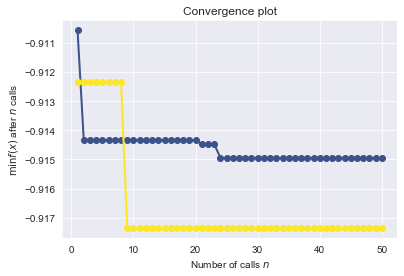

In [84]:
plot_convergence(rs_hip_lgr,bo_hip_lgr)

plt.show()

# 

## Feature Selection

#### https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

# 

## Testar Outros Algoritmos